# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


Here we can see one of the images.

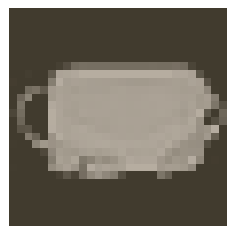

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [24]:
# TODO: Define your network architecture here
input_size = 784
hidden_sizes = [256, 128, 64]
output_size = 10

model = nn.Sequential(
    nn.Linear(in_features=input_size, out_features=hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(in_features=hidden_sizes[0], out_features=hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(in_features=hidden_sizes[1], out_features=hidden_sizes[2]),
    nn.ReLU(),
    nn.Linear(in_features=hidden_sizes[2], out_features=output_size),
)

model.cuda()
model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
)

In [25]:
next(model.parameters()).is_cuda

True

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [26]:
# TODO: Create the network, define the criterion and optimizer
lr = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [28]:
# TODO: Train the network here
epochs = 10
print_steps = 40
step = 0

for e in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:
        step += 1
        
        # resize input to vector
        images.resize_(images.shape[0], input_size)
        
        # forward pass
        optimizer.zero_grad()
        output = model.forward(images.cuda())
        
        # calculate loss
        loss = criterion(output, labels.cuda())
        
        # calculate gradients
        loss.backward()
        
        # update weights
        optimizer.step()
        
        # logs
        running_loss += loss.item()
        if step % print_steps == 0:
            print(
                "Epoch: {}/{} | ".format(e+1, epochs),
                "Loss: {:.4f}".format(running_loss / print_steps)
            )
            running_loss = 0

Epoch: 1/10 |  Loss: 2.2941
Epoch: 1/10 |  Loss: 2.2715
Epoch: 1/10 |  Loss: 2.2390
Epoch: 1/10 |  Loss: 2.1937
Epoch: 1/10 |  Loss: 2.1260
Epoch: 1/10 |  Loss: 2.0164
Epoch: 1/10 |  Loss: 1.8565
Epoch: 1/10 |  Loss: 1.6477
Epoch: 1/10 |  Loss: 1.4545
Epoch: 1/10 |  Loss: 1.2950
Epoch: 1/10 |  Loss: 1.1615
Epoch: 1/10 |  Loss: 1.0690
Epoch: 1/10 |  Loss: 1.0053
Epoch: 1/10 |  Loss: 0.9482
Epoch: 1/10 |  Loss: 0.8838
Epoch: 1/10 |  Loss: 0.8728
Epoch: 1/10 |  Loss: 0.8578
Epoch: 1/10 |  Loss: 0.8094
Epoch: 1/10 |  Loss: 0.7693
Epoch: 1/10 |  Loss: 0.7441
Epoch: 1/10 |  Loss: 0.7599
Epoch: 1/10 |  Loss: 0.7196
Epoch: 1/10 |  Loss: 0.6955
Epoch: 2/10 |  Loss: 0.3664
Epoch: 2/10 |  Loss: 0.6861
Epoch: 2/10 |  Loss: 0.6962
Epoch: 2/10 |  Loss: 0.6694
Epoch: 2/10 |  Loss: 0.6926
Epoch: 2/10 |  Loss: 0.6757
Epoch: 2/10 |  Loss: 0.6367
Epoch: 2/10 |  Loss: 0.6380
Epoch: 2/10 |  Loss: 0.6340
Epoch: 2/10 |  Loss: 0.6122
Epoch: 2/10 |  Loss: 0.6446
Epoch: 2/10 |  Loss: 0.6021
Epoch: 2/10 |  Loss:

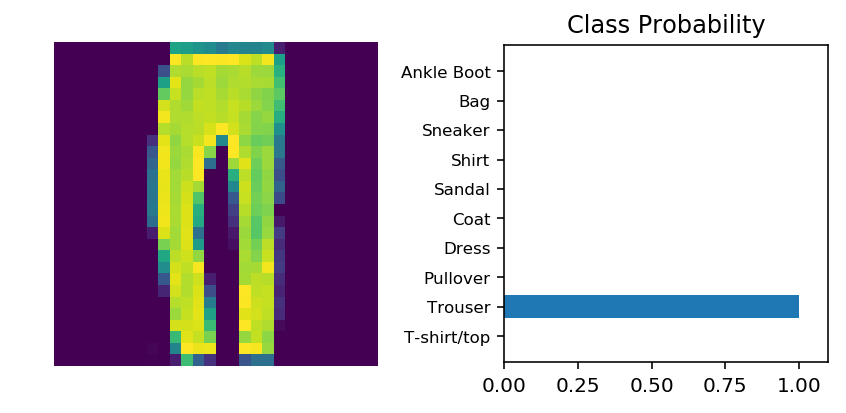

In [38]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logits = model.forward(img.cuda())

ps = F.softmax(logits, dim=1).cpu()

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.